In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv("..\\data\\training\\raw\\train.csv")
test_df = pd.read_csv("..\\data\\training\\raw\\test.csv")

print("shape of train dataset : " , train_df.shape)
print("shape of test dataset : " , test_df.shape)

shape of train dataset :  (1460, 81)
shape of test dataset :  (1459, 80)


In [3]:
numeric_features = train_df.drop(columns = ['Id', 'SalePrice'], axis=1).select_dtypes(include=["int64", "float64"]).columns
categorical_features = train_df.drop(columns = ['Id', 'SalePrice'], axis=1).select_dtypes(include=["object"]).columns

print("Numerical:", len(numeric_features))
print("Categorical:", len(categorical_features))

Numerical: 36
Categorical: 43


mean will be shifted for the LotFrontage and MasVnrArea features that why we'll use Median and for GarageYrBlt mean or median both will be good

In [4]:
train_df[numeric_features] = train_df[numeric_features].fillna(train_df[numeric_features].median())

In [5]:
# filling this categorical features with specific values because missing values has there own important meaning (i know this because it is already present in the 'data_description.txt' file)

train_df['Alley'] = train_df['Alley'].fillna('No_alley_access')
train_df['GarageType'] = train_df['GarageType'].fillna('No_Garage')
train_df['MiscFeature'] = train_df['MiscFeature'].fillna('None')

# because the hint is available in the 'data_description.txt' file 
train_df['MasVnrType'] = train_df['MasVnrType'].fillna("None")

# here i am filling the mode because only record is missing so it doesnot affect the distribution of the data
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [6]:
# performing ordinal encoding and keep the importantance of missing values 
ordinal_mappings = {

    'ExterQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'ExterCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},

    'BsmtQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},
    'BsmtCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},

    'BsmtExposure': {'Gd':4, 'Av':3, 'Mn':2, 'No':1, np.nan:0},

    'BsmtFinType1': {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0},
    'BsmtFinType2': {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0},

    'HeatingQC': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},

    'KitchenQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},

    'FireplaceQu': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},

    'GarageFinish': {'Fin':4, 'RFn':3, 'Unf':2, np.nan:1},
    'GarageQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},
    'GarageCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},

    'PavedDrive': {'Y':3, 'P':2, 'N':1},

    'PoolQC': {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, np.nan:0},

    'Fence': {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, np.nan:0}
}

# final replacement
for col, mapping in ordinal_mappings.items():
    if col in train_df.columns:
        train_df[col] = train_df[col].map(mapping)

In [7]:
# no missing values 
train_df.isna().sum() [ train_df.isna().sum() > 0]

Series([], dtype: int64)

# feature engineering

In [8]:
# New Features to add (train_df only)

train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
train_df['totalbaths'] =  train_df['BsmtFullBath'] +  train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath'])
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']

In [9]:
# # fixing "MSSubClass" features it is can categorical feature not a numerical
train_df['MSSubClass'] = train_df['MSSubClass'].astype('object')

# again doing this because we have applied ordinal encoding by replace the category with numbers
numeric_features = train_df.drop(columns = ['Id','SalePrice'], axis=1).select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = train_df.drop(columns = ['Id','SalePrice'], axis=1).select_dtypes(include=["object"]).columns.tolist()

print("Numerical:", len(numeric_features))
print("Categorical:", len(categorical_features))

Numerical: 57
Categorical: 28


In [10]:
train_df[numeric_features].corrwith(train_df['SalePrice']).sort_values(ascending=False)

OverallQual        0.790982
totalarea          0.778959
GrLivArea          0.708624
totalsf            0.708047
ExterQual          0.682639
KitchenQual        0.659600
GarageCars         0.640409
totalbaths         0.631731
GarageArea         0.623431
TotalBsmtSF        0.613581
1stFlrSF           0.605852
BsmtQual           0.585207
FullBath           0.560664
GarageFinish       0.549247
TotRmsAbvGrd       0.533723
YearBuilt          0.522897
FireplaceQu        0.520438
YearRemodAdd       0.507101
MasVnrArea         0.472614
Fireplaces         0.466929
GarageYrBlt        0.466754
HeatingQC          0.427649
totalporchsf       0.390993
BsmtFinSF1         0.386420
BsmtExposure       0.374696
LotFrontage        0.334771
WoodDeckSF         0.324413
2ndFlrSF           0.319334
OpenPorchSF        0.315856
BsmtFinType1       0.304908
HalfBath           0.284108
GarageQual         0.273839
LotArea            0.263843
GarageCond         0.263191
PavedDrive         0.231357
BsmtFullBath       0

# Correlation with SalePrice Feature

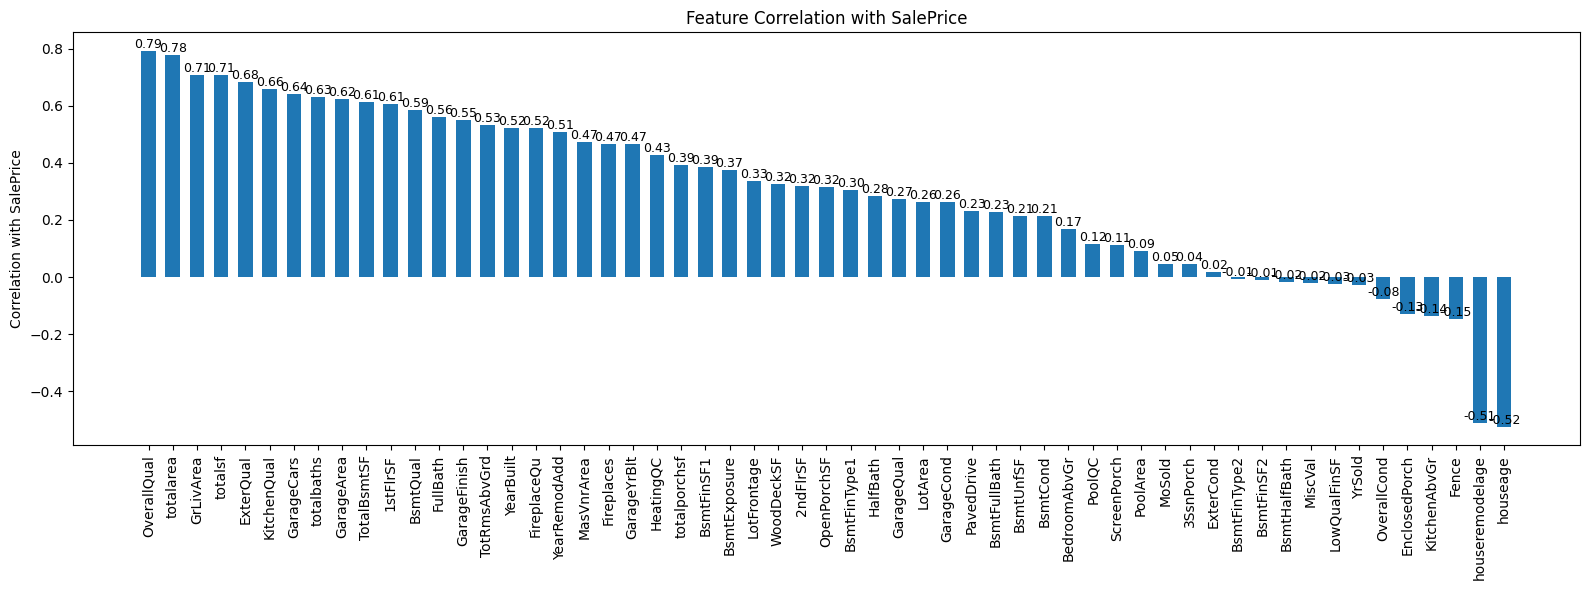

In [11]:
import matplotlib.pyplot as plt

# Calculate correlations
corr_values = (
    train_df[numeric_features]
    .corrwith(train_df['SalePrice'])
    .sort_values(ascending=False)
)

# Create figure with enough space
plt.figure(figsize=(16, 6))

# Plot bars with spacing
bars = plt.bar(
    corr_values.index,
    corr_values.values,
    width=0.6  # smaller width = more space between bars
)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Improve readability
plt.xticks(rotation=90)
plt.ylabel("Correlation with SalePrice")
plt.title("Feature Correlation with SalePrice")
plt.tight_layout()

plt.show()

In [12]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,houseage,houseremodelage,totalsf,totalarea,totalbaths,totalporchsf
0,1,60,RL,65.0,8450,Pave,No_alley_access,Reg,Lvl,AllPub,...,2008,WD,Normal,208500,5,5,2416,2566,3.5,61
1,2,20,RL,80.0,9600,Pave,No_alley_access,Reg,Lvl,AllPub,...,2007,WD,Normal,181500,31,31,2240,2524,2.5,298
2,3,60,RL,68.0,11250,Pave,No_alley_access,IR1,Lvl,AllPub,...,2008,WD,Normal,223500,7,6,2272,2706,3.5,42
3,4,70,RL,60.0,9550,Pave,No_alley_access,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000,91,36,1933,2473,2.0,307
4,5,60,RL,84.0,14260,Pave,No_alley_access,IR1,Lvl,AllPub,...,2008,WD,Normal,250000,8,8,2853,3343,3.5,276


# Outlier handling (IQR clipping) normal

In [13]:
# # Outlier handling (IQR clipping)

# # scale of values are different
# ordinal_features = train_df[numeric_features].max()  [ train_df[numeric_features].max()<= 10].index.tolist()
# print(len(ordinal_features))

# # this features needed the outlier treatment and scaling because rest are ordinal features and OHE
# features_need_work = list(set(numeric_features) - set (ordinal_features))
# print(len(features_need_work))

# # Store IQR limits from train data
# iqr_bounds = {}

# def iqr_clipping(df, cols):
#     for col in cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
        
#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR
        
#         iqr_bounds[col] = (lower, upper)
        
#         df[col] = np.clip(df[col], lower, upper)
    
#     return df
  

# train_df = iqr_clipping(train_df, features_need_work)

# # feature scaling 
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_df[features_need_work] = scaler.fit_transform(train_df[features_need_work])

# outlier clipping on extreme values only

In [14]:
# Outlier handling (EXTREME-only removal)

import numpy as np
import pandas as pd

# scale of values are different
ordinal_features = (
    train_df[numeric_features]
    .max()[train_df[numeric_features].max() <= 10]
    .index.tolist()
)
print(len(ordinal_features))

# features that need outlier treatment + scaling
features_need_work = list(set(numeric_features) - set(ordinal_features))
print(len(features_need_work))

# Store bounds from train data
clip_bounds = {}

def extreme_outlier_removal(df, cols, lower_q=0.01, upper_q=0.99):
    mask = pd.Series(True, index=df.index)
    
    for col in cols:
        lower = df[col].quantile(lower_q)
        upper = df[col].quantile(upper_q)
        
        clip_bounds[col] = (lower, upper)
        mask &= df[col].between(lower, upper)
    
    return df[mask].reset_index(drop=True)


# Apply removal
train_df = extreme_outlier_removal(train_df, features_need_work)

print("Train shape after extreme outlier removal:", train_df.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[features_need_work] = scaler.fit_transform(train_df[features_need_work])

27
30
Train shape after extreme outlier removal: (1202, 87)


# Outlier Removal

In [15]:
# import numpy as np
# from sklearn.preprocessing import StandardScaler

# # Ordinal-like numeric features (small scale → no scaling / no outlier handling)
# ordinal_features = train_df[numeric_features].max()[train_df[numeric_features].max() <= 10].index.tolist()

# # Features that need outlier treatment + scaling
# features_need_work = list(set(numeric_features) - set(ordinal_features))

# print("Ordinal features:", len(ordinal_features))
# print("Features needing work:", len(features_need_work))

# iqr_bounds = {}

# def iqr_outlier_removal(df, cols):
#     mask = pd.Series(True, index=df.index)
    
#     for col in cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
        
#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR
        
#         iqr_bounds[col] = (lower, upper)
        
#         mask &= df[col].between(lower, upper)
    
#     return df[mask].reset_index(drop=True)


# train_df = iqr_outlier_removal(train_df, features_need_work)

# print("Train shape after outlier removal:", train_df.shape)


# scaler = StandardScaler()
# train_df[features_need_work] = scaler.fit_transform(train_df[features_need_work])

In [16]:
# # scale of values are different
# ordinal_features = train_df[numeric_features].max()  [ train_df[numeric_features].max()<= 10].index.tolist()
# len(ordinal_features)

In [17]:
# # this features needed the outlier treatment and scaling because rest are ordinal features and OHE
# features_need_work = list(set(numeric_features) - set (ordinal_features))
# print(len(features_need_work))

In [18]:
# # Store IQR limits from train data
# iqr_bounds = {}

# def iqr_clipping(df, cols):
#     for col in cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
        
#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR
        
#         iqr_bounds[col] = (lower, upper)
        
#         df[col] = np.clip(df[col], lower, upper)
    
#     return df
  

# train_df = iqr_clipping(train_df, features_need_work)

In [19]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# train_df[features_need_work] = scaler.fit_transform(train_df[features_need_work])

In [20]:
# train_df[numeric_features].describe()

# OHE

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        (
            'cat',
            OneHotEncoder(
                drop='first',
                handle_unknown='ignore',
                sparse_output=False,
                dtype=np.int8     # OHE output must be integers
            ),
            categorical_features
        ),
        ('num', 'passthrough', numeric_features)
    ]
)

# only we encoding in x features not the target features
x_train_encoded = preprocessor.fit_transform(train_df.drop(columns=['Id', 'SalePrice']))

print("Shape of train dataset after OHE:", x_train_encoded.shape)

Shape of train dataset after OHE: (1202, 219)


In [22]:
model_name = []
rmse_error = []

rmse_data_dict = {
    "model_name" : model_name,
    "rmse_error" : rmse_error
}

In [23]:
ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

all_features = np.concatenate([ohe_features, numeric_features])

x_train_encoded_df = pd.DataFrame(
    x_train_encoded,
    columns=all_features,
    index=train_df.index
)

corr_with_target = x_train_encoded_df.corrwith(train_df['SalePrice'])

c:\Users\Manish\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Manish\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [24]:
corr_with_target.sort_values(ascending=False).head(10)

OverallQual    0.804665
totalarea      0.801245
totalsf        0.714074
GrLivArea      0.704563
ExterQual      0.697496
KitchenQual    0.677684
GarageCars     0.646913
totalbaths     0.638081
GarageArea     0.631167
BsmtQual       0.620257
dtype: float64

In [25]:
# print(all_features)

In [26]:
x_train_encoded_df.max() [x_train_encoded_df.max() > 1].shape

(55,)

# linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = x_train_encoded
y = np.log1p(train_df['SalePrice'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)
lr_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# storing for future use
model_name.append("LinearRegression")
rmse_error.append(lr_rmse)

lr_rmse

0.10276059596615596

# Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# x = train_df_encoded.drop(columns = ['Id', 'SalePrice'], axis=1)
# y = np.log1p(train_df_encoded['SalePrice'])

x = x_train_encoded
y = np.log1p(train_df['SalePrice'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# storing for the future use
model_name.append("RandomForestRegressor")
rmse_error.append(rf_rmse)

rf_rmse

0.11037976090611461

# Ridge Regression

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# x = train_df_encoded.drop(columns=['Id', 'SalePrice'], axis=1)
# y = np.log1p(train_df_encoded['SalePrice'])

x = x_train_encoded
y = np.log1p(train_df['SalePrice'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.55, random_state=42)

ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_val)
ridge_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# storing for future use
model_name.append("RidgeRegression")
rmse_error.append(ridge_rmse)

ridge_rmse

0.0980382743658267

# XG Boost

In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# x = train_df_encoded.drop(columns=['Id', 'SalePrice'], axis=1)
# y = np.log1p(train_df_encoded['SalePrice'])

x = x_train_encoded
y = np.log1p(train_df['SalePrice'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_val)
xgb_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# storing for future use
model_name.append("XGBoostRegressor")
rmse_error.append(xgb_rmse)

xgb_rmse

0.0984816948566096

### Minimum RMSE Error Model

In [31]:
rmse_data_dict = {
    "model_name" : model_name,
    "rmse_error" : rmse_error
}

pd.DataFrame(rmse_data_dict).sort_values(by = 'rmse_error').head(3)

,model_name,rmse_error
2,RidgeRegression,0.098038
3,XGBoostRegressor,0.098482
0,LinearRegression,0.102761


# preparing submission file

In [32]:
test_df = pd.read_csv('..\\data\\training\\raw\\test.csv')
test_df.shape

(1459, 80)

In [33]:
# # fixing "MSSubClass" features it is can categorical feature not a numerical
test_df['MSSubClass'] = test_df['MSSubClass'].astype('object')

test_numeric_features = test_df.drop(columns = ['Id'], axis=1).select_dtypes(include=["int64", "float64"]).columns
test_categorical_features = test_df.drop(columns = ['Id'], axis=1).select_dtypes(include=["object"]).columns

print("shape of numeric features -> ", len(test_numeric_features))
print("shape of categorical features -> ", len(test_categorical_features))

test_df[test_numeric_features] =test_df[test_numeric_features].fillna(test_df[test_numeric_features].median())

shape of numeric features ->  35
shape of categorical features ->  44


In [34]:
# filling this categorical features with specific values because missing values has there own important meaning (i know this because it is already present in the 'data_description.txt' file)
test_df['Alley'] = test_df['Alley'].fillna('No_alley_access')
test_df['GarageType'] = test_df['GarageType'].fillna('No_Garage')
test_df['MiscFeature'] = test_df['MiscFeature'].fillna('None')

# because the hint is available in the 'data_description.txt' file 
test_df['MasVnrType'] = test_df['MasVnrType'].fillna("None")

# here i am filling the mode because only record is missing so it doesnot affect the distribution of the data
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])

In [35]:
# final replacement on test data
for col, mapping in ordinal_mappings.items():
    if col in test_df.columns:
        test_df[col] = test_df[col].map(mapping)

In [36]:
# missing values are remaing in this features 
test_df[test_categorical_features].isna().sum() [test_df[test_categorical_features].isna().sum() > 0]

MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64

# feature engineering

In [37]:
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['houseremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'])
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [38]:
# if left any other missing categorical features then filling with mode values
missing_cat_features = test_df[test_categorical_features].isna().sum() [test_df[test_categorical_features].isna().sum() > 0].index.tolist()

if len(missing_cat_features) > 0 :
    test_df[missing_cat_features] = test_df[missing_cat_features].fillna(test_df[missing_cat_features].mode().iloc[0])

In [39]:
print("numerical features in test_df -> ", len(test_df.select_dtypes(exclude='object').drop(columns=['Id']).columns.tolist()))
print("categorical features in test_df -> ",len(test_df.select_dtypes(include='object').columns.tolist()))

# output : 
# categorical features in test_df ->  21
# numerical features in test_df ->  58


# again doing this because we have applied ordinal encoding by replace the category with numbers

numeric_features = train_df.drop(columns = ['Id','SalePrice'], axis=1).select_dtypes(include=["int64", "float64"]).columns
categorical_features = train_df.drop(columns = ['Id','SalePrice'], axis=1).select_dtypes(include=["object"]).columns

print("Numerical:", len(numeric_features))
print("Categorical:", len(categorical_features))

# output:
# Numerical: 52
# Categorical: 27


numerical features in test_df ->  57
categorical features in test_df ->  28
Numerical: 57
Categorical: 28


In [40]:
# Apply stored clipping bounds to test data
for col, (lower, upper) in clip_bounds.items():
    test_df[col] = np.clip(test_df[col], lower, upper)

# this below code not work for extreme clipping

In [41]:
# # Apply clipping to test data using train bounds
# for col in features_need_work:                             # numeric_features:
#     lower, upper = iqr_bounds[col]
#     test_df[col] = np.clip(test_df[col], lower, upper)

In [42]:
# Use scaler already fitted on train_df

test_df[features_need_work] = scaler.transform(test_df[features_need_work])
# test_df[numeric_features] = scaler.transform(test_df[numeric_features])

In [43]:
# performing OHE in test dataset
x_test_encoded = preprocessor.transform(test_df.drop(columns=['Id']))
print("Shape of test dataset after OHE:", x_test_encoded.shape)

Shape of test dataset after OHE: (1459, 219)


c:\Users\Manish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 11, 25] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# XGB

In [44]:
# # training the model again with full training data

# x_train = x_train_encoded
# y_train = np.log1p(train_df['SalePrice'])

# xgb = XGBRegressor(
#     n_estimators=550,
#     learning_rate=0.05,
#     max_depth=4,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42,
#     n_jobs=-1
# )

# xgb.fit(x_train, y_train)

# y_pred = xgb.predict(x_train)
# xgb_rmse = np.sqrt(mean_squared_error(y_train, y_pred))

# # storing for future use
# model_name.append("XGBoostRegressor")
# rmse_error.append(xgb_rmse)

# print("rmse on whole training data : ", xgb_rmse)

# Ridge

In [45]:
# x_train = x_train_encoded
# y_train = np.log1p(train_df['SalePrice'])

# ridge = Ridge(alpha=0.55, random_state=42)

# ridge.fit(x_train, y_train)

# y_pred = ridge.predict(x_train)
# ridge_rmse = np.sqrt(mean_squared_error(y_train, y_pred))

# # storing for future use
# model_name.append("RidgeRegression")
# rmse_error.append(ridge_rmse)

# print("rmse on whole training data -> ", ridge_rmse)

In [46]:
# using the XGB lowest RMSE error model object to make prediction on the test data
test_predictions = ridge.predict(x_test_encoded)
test_predictions = np.expm1(test_predictions)
test_predictions

array([119211.08777563, 177702.63392105, 179452.05965501, ...,
       165654.9256171 , 124355.76477265, 224277.28545353])

In [47]:
# # using the XGB lowest RMSE error model object to make prediction on the test data
# test_predictions = xgb.predict(x_test_encoded)
# test_predictions = np.expm1(test_predictions)
# test_predictions

In [48]:
# creating submission file for this approach

submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_predictions
})

submission.to_csv("..\\data\\submissions\\another_submission.csv", index=False)

In [49]:
# printing first 5 record of the submission file
submission.head()

,Id,SalePrice
0,1461,119211.087776
1,1462,177702.633921
2,1463,179452.059655
3,1464,197436.219583
4,1465,189892.764807
